In [1]:
import pandas as pd
from finlab import data
import numpy as np
import ast

In [4]:
# themes = pd.read_pickle('data/themes.pkl')
stock_df = pd.read_csv(r'C:\Users\User\Downloads\StockList (4).csv')
# index_df = pd.read_pickle('data/index_df.pkl')
# adj_close = pd.read_pickle('data/adj_close.pkl')
# debts_df = pd.read_pickle('data/debts.pkl')

In [5]:
stock_df.head(20)

,排名,代號,名稱,成交,最高,最低,漲跌價,漲跌幅,更新日期,5日最高股價(元),...,5日最低股價(元),現距5日低點漲幅,10日最高股價(元),現距10日高點跌幅,10日最低股價(元),現距10日低點漲幅,1個月最高股價(元),現距1個月高點跌幅,1個月最低股價(元),現距1個月低點漲幅
0,1,"=""3494""",誠研,16.25,17.25,15.35,0.55,3.50,11/27,17.95,...,14.30,13.60,17.95,-9.47,14.30,13.60,17.95,-9.47,7.85,107.0
1,2,"=""3706""",神達,83.80,87.20,83.30,0.50,0.60,11/27,87.20,...,71.50,17.20,87.20,-3.90,62.50,34.10,87.20,-3.90,44.05,90.2
2,3,"=""5314""",世紀,361.00,371.00,361.00,-10.00,-2.70,11/27,379.00,...,306.50,17.80,379.00,-4.75,268.00,34.70,379.00,-4.75,202.00,78.7
3,4,"=""1569""",濱川,61.70,64.00,61.20,-2.30,-3.59,11/27,65.00,...,52.30,18.00,65.00,-5.08,42.75,44.30,65.00,-5.08,35.10,75.8
4,5,"=""8101""",華冠,18.30,18.30,18.30,1.65,9.91,11/27,18.30,...,12.55,45.80,18.30,0.00,10.45,75.10,18.30,0.00,10.45,75.1
5,6,"=""8937""",合騏,141.00,150.50,133.50,-1.00,-0.70,11/27,159.50,...,133.50,5.62,159.50,-11.60,125.00,12.80,159.50,-11.60,80.60,74.9
6,7,"=""6558""",興能高,36.65,39.30,35.55,0.90,2.52,11/27,39.30,...,28.75,27.50,39.30,-6.74,25.10,46.00,39.30,-6.74,21.10,73.7
7,8,"=""4931""",新盛力,57.00,60.30,56.00,0.70,1.24,11/27,60.30,...,49.30,15.60,60.30,-5.47,46.30,23.10,60.30,-5.47,33.20,71.7
8,9,"=""6144""",得利影,51.20,51.20,48.65,4.60,9.87,11/27,51.20,...,31.65,61.80,51.20,0.00,29.85,71.50,69.00,-25.80,29.85,71.5
9,10,"=""4991""",環宇-KY,102.50,102.50,88.30,9.00,9.63,11/27,102.50,...,85.50,19.90,102.50,0.00,80.80,26.90,102.50,0.00,60.40,69.7


In [4]:
def find_sector(row):
  all_cat = ast.literal_eval(row['category'])
  sector_list = sector_index_ranks.columns
  for cat in all_cat:
    for sector in sector_list:
      if cat in sector:
        return sector
  return all_cat[0]
themes.head()

,stock_id,name,category,key_date
0,1101,台泥,"['水泥', '水泥:水泥成品', '水泥:水泥熟料', '水泥:水泥生料', '水泥:石灰...",2023-12-01 09:21:33.524401
1,1102,亞泥,"['水泥', '水泥:水泥熟料', '風力發電', '風力發電:發電營運', '風力發電:風...",2023-12-01 09:21:33.524401
2,1103,嘉泥,"['交通運輸及航運', '交通運輸及航運:貨櫃運輸集散及倉儲', '建材營造', '建材營造...",2023-12-01 09:21:33.524401
3,1104,環泥,"['水泥', '水泥:水泥成品', '水泥:預拌混凝土']",2023-12-01 09:21:33.524401
4,1108,幸福,"['水泥', '水泥:水泥成品', '水泥:水泥熟料', '水泥:水泥生料', '水泥:石灰...",2023-12-01 09:21:33.524401


In [3]:
stock_df['theme'] = stock_df.apply(find_sector, axis=1)

,排名,代號,名稱,成交,最高,最低,漲跌價,漲跌幅,更新日期,5日最高股價(元),...,5日最低股價(元),現距5日低點漲幅,10日最高股價(元),現距10日高點跌幅,10日最低股價(元),現距10日低點漲幅,1個月最高股價(元),現距1個月高點跌幅,1個月最低股價(元),現距1個月低點漲幅
0,1,"=""9906""",欣巴巴,208.00,227.00,206.00,-5.50,-2.58,08/02,227.00,...,171.50,21.30,227.00,-8.37,146.00,42.5,227.00,-8.37,91.8,127.0
1,2,"=""2524""",京城,115.50,121.50,110.50,2.00,1.76,08/02,121.50,...,85.50,35.10,121.50,-4.94,67.90,70.1,121.50,-4.94,53.2,117.0
2,3,"=""6228""",全譜,72.70,75.70,70.90,-3.10,-4.09,08/02,78.60,...,65.60,10.80,78.60,-7.51,44.90,61.9,78.60,-7.51,35.3,106.0
3,4,"=""6144""",得利影,81.90,85.00,76.70,3.40,4.33,08/02,88.00,...,76.70,6.78,92.30,-11.30,58.30,40.5,92.30,-11.30,41.1,99.3
4,5,"=""4510""",高鋒,38.25,38.25,32.35,3.45,9.91,08/02,38.25,...,26.25,45.70,38.25,0.00,26.25,45.7,38.25,0.00,19.3,98.2


,symbol,growth_percentage
2186,9103,2107.358404
1425,4743,710.084034
1058,3228,496.910112
1779,6204,496.047622
1879,6443,433.887468


In [45]:
debts_df[(debts_df.index.str.contains('2020'))|debts_df.index.str.contains('2019')].ffill()

symbol,000116,000538,000616,000700,000779,000815,000888,000930,000960,000980,...,9964,9968,9971,9977,9978,9982,9983,9984,9985,9986
date,,,,,,,,,,,,,,,,,,,,,
2019-Q1,65.861168,71.094911,68.837458,72.24687,78.834894,78.881042,78.009019,71.133609,73.326442,84.650969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-Q2,65.861168,71.094911,68.837458,72.24687,78.834894,78.881042,78.009019,71.133609,73.326442,84.650969,...,3.985431,26.541280,28.074056,39.168361,39.659933,30.345002,57.373292,50.645028,24.260667,66.639052
2019-Q3,65.861168,71.094911,68.837458,72.24687,78.834894,78.881042,78.009019,71.133609,73.326442,84.650969,...,3.985431,26.541280,28.074056,39.168361,39.659933,30.345002,57.373292,50.645028,24.260667,66.639052
2019-Q4,65.861168,71.094911,68.837458,72.24687,78.834894,78.881042,78.009019,71.133609,73.326442,84.650969,...,1.053861,28.056852,24.272397,35.630862,31.619090,29.765121,63.099883,50.122409,24.794988,65.793357
2020-Q1,65.861168,71.094911,68.837458,72.24687,78.834894,78.881042,78.009019,71.133609,73.326442,84.650969,...,1.053861,28.056852,24.272397,35.630862,31.619090,29.765121,63.099883,50.122409,24.794988,65.793357
2020-Q2,65.861168,71.094911,68.837458,72.24687,78.834894,78.881042,78.009019,71.133609,73.326442,84.650969,...,5.804350,25.377422,25.746837,43.445376,34.806194,27.997848,66.322067,49.805079,24.936024,64.524464
2020-Q3,65.861168,71.094911,68.837458,72.24687,78.834894,78.881042,78.009019,71.133609,73.326442,84.650969,...,5.804350,25.377422,25.746837,43.445376,34.806194,27.997848,66.322067,49.805079,24.936024,64.524464


In [56]:
growth_percentage_df.dropna().iloc[-10:]

,symbol,growth_percentage
1775,3086,-57.724551
1776,3085,-59.679408
1777,3686,-60.247196
1778,2321,-60.248447
1779,3452,-60.750000
1780,5310,-61.026616
1781,6404,-63.056680
1782,00677U,-67.891892
1783,2719,-68.784688
1784,6497,-70.810811


In [59]:
year = 2018
data_2020 = adj_close[adj_close.index.year == year]
# Get the first and last available closing prices in 2020 for each stock
start_prices = data_2020.iloc[0]
end_prices = data_2020.iloc[-1]

# Calculate the growth percentage
growth_percentage = ((end_prices - start_prices) / start_prices) * 100

# Display the growth percentages
growth_percentage_df = growth_percentage.reset_index()
growth_percentage_df.columns = ['symbol', 'growth_percentage']
growth_percentage_df = growth_percentage_df.sort_values('growth_percentage', ascending=False).dropna()

# Example data for stock debts
debts_df = debts_df.ffill()
con1 = debts_df.index.str.contains(str(year))
con2 = debts_df.index.str.contains(str(year-1))
debts_2020 = debts_df[con1|con2]
# Rank the stocks based on their growth percentage
growth_percentage_df = growth_percentage_df.sort_values(by='growth_percentage', ascending=False).reset_index(drop=True)

# Separate stocks into groups and calculate the percentage of debts going up for each group
groups = {
    'top_10': growth_percentage_df.iloc[:10],
    'top_20': growth_percentage_df.iloc[:20],
    'bottom_20': growth_percentage_df.iloc[-20:],
    'bottom_10': growth_percentage_df.iloc[-10:],
}

# Function to calculate the percentage of debts going up for a given group
def calculate_debt_percentage(group_symbols):
    debt_increase_count = 0
    total_count = 0
    
    for symbol in group_symbols:
        if symbol in debts_2020.columns:
            start_debt = debts_2020[symbol].iloc[0]
            end_debt = debts_2020[symbol].iloc[-1]
            if end_debt > start_debt:
                debt_increase_count += 1
            total_count += 1
    
    return (debt_increase_count / total_count) * 100 if total_count > 0 else 0

# Calculate debt percentage for each group
debt_percentages = {group_name: calculate_debt_percentage(group['symbol']) for group_name, group in groups.items()}

print(debt_percentages)

{'top_10': 50.0, 'top_20': 50.0, 'bottom_20': 85.0, 'bottom_10': 70.0}


In [35]:
growth_percentage_df

,symbol,growth_percentage
0,9103,2107.358404
1,4743,710.084034
2,3228,496.910112
3,6204,496.047622
4,6443,433.887468
...,...,...
2261,9151,NaN
2262,9157,NaN
2263,916665,NaN
2264,9915,NaN


In [32]:
debt_df.iloc[20:25, 20:25]

symbol,1115,1201,1203,1210,1213
date,,,,,
2018-Q1,NaN,75.407957,37.267881,44.917946,17.212564
2018-Q2,NaN,76.752432,38.845391,48.569950,20.322236
2018-Q3,NaN,72.532342,37.818534,48.710993,52.356955
2018-Q4,NaN,70.811418,34.851582,47.743766,53.703168
2019-Q1,NaN,64.118296,35.149221,47.367940,56.344065


<Axes: xlabel='date'>

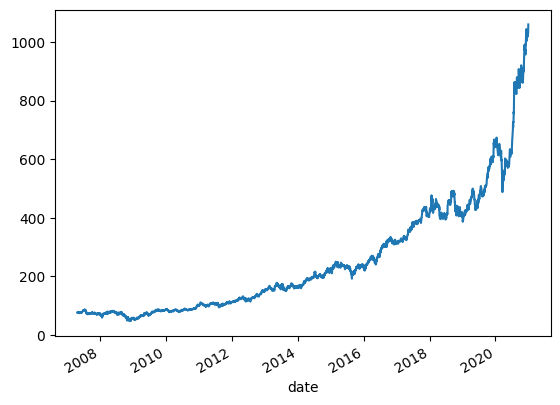

In [4]:
adj_close['2330'].plot()

In [12]:
# target = themes[themes['category'].str.contains('其他電子')]
target = themes[themes['stock_id'].str.contains('6414')]
target

,stock_id,name,category,key_date
1207,5530,龍巖,"['其他', '其他:其他', '建材營造', '建材營造:建設業']",2023-12-01 09:21:33.524401


In [11]:
target['category'].iloc[0]

"['其他', '其他:其他電子產品及電子服務產業', '平面顯示器', '平面顯示器:監視器_顯示器', '平面顯示器:電視', '貿易百貨', '貿易百貨:製造商', '貿易百貨:貿易商、代理商、經銷商', '貿易百貨:零售通路', '通信網路', '通信網路:有線通訊設備(如電話機、傳真機)', '電機機械', '電機機械:冷凍空調設備及零件']"

C:\Users\User\AppData\Local\Temp\ipykernel_5360\3546896824.py:2: FutureWarning: The default fill_method='pad' in FinlabDataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change = adj_close.pct_change().iloc[1:][list(mod_set)]


<Axes: xlabel='date'>

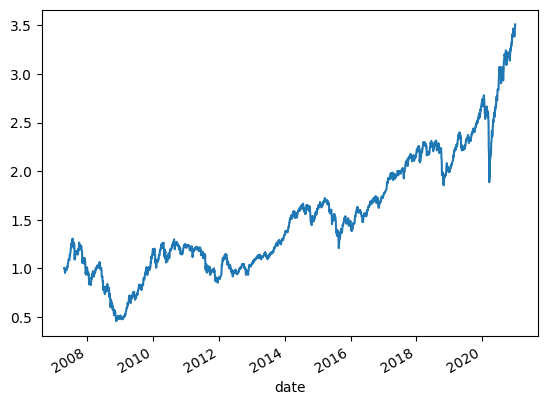

In [8]:
mod_set = set(list(target['stock_id'])) - set(['4577', '4588', '6689', '6691', '6735', '6761', '6776', '6830', '6840', '6855', '6877'])
pct_change = adj_close.pct_change().iloc[1:][list(mod_set)]
# adj_close.pct_change().iloc[1:][list(target['stock_id'])]
pct_change[adj_close.isna()] = np.nan
industry_price = pct_change.mean(axis=1).add(1).cumprod()
industry_price.plot()

In [9]:
pct_change.tail()

symbol,2497,3219,5225,2059,6208,6146,3055,2443,2477,8109,...,3597,6654,6277,2360,3580,2354,3002,1614,3043,2414
date,,,,,,,,,,,,,,,,,,,,,
2020-12-25,0.011029,0.003135,-0.001908,0.005000,-0.001348,0.007890,-0.015038,0.035599,-0.001603,0.007386,...,-0.002558,0.010471,0.002384,0.000000,0.018966,0.018975,0.003745,0.002801,-0.053803,0.000000
2020-12-28,0.100000,0.000000,-0.003824,0.000000,0.001350,0.029354,-0.007634,-0.025000,0.036918,-0.004399,...,0.000000,-0.012090,0.003567,-0.005848,-0.008460,0.005587,0.011194,0.018156,-0.015686,0.013752
2020-12-29,0.099174,-0.020833,0.021113,-0.006633,0.000000,-0.003802,-0.003077,-0.003205,0.015480,0.002946,...,-0.007692,0.000000,-0.002370,-0.011765,-0.017065,-0.011111,-0.007380,-0.001372,0.000000,-0.003876
2020-12-30,-0.031579,-0.017021,0.035714,-0.003339,0.017520,0.007634,0.000000,-0.025723,-0.006098,-0.001468,...,0.012920,0.006993,0.004751,0.011905,0.017361,0.003745,0.007435,0.016484,0.015936,0.000000
2020-12-31,0.012422,-0.004329,0.001815,-0.005025,-0.003974,0.015152,-0.001543,0.003300,0.073620,0.004412,...,0.000000,-0.001736,0.000000,-0.011765,0.029010,-0.003731,0.014760,-0.005405,0.000000,0.000000


In [5]:
monthly_industry_price = industry_price.resample('M').last()
monthly_industry_pct = ((monthly_industry_price/monthly_industry_price.shift()-1)*100).dropna()
monthly_industry_pct

date
2007-05-31     5.525554
2007-06-30    10.537784
2007-07-31    10.228960
2007-08-31     5.332895
2007-09-30     7.724114
                ...    
2020-08-31     4.651120
2020-09-30    -4.019212
2020-10-31     0.455355
2020-11-30     8.925144
2020-12-31     6.985900
Freq: M, Length: 164, dtype: float64

In [6]:
plot_data = pd.DataFrame({'pct':monthly_industry_pct})
plot_data['year'] = plot_data.index.year
plot_data['month'] = plot_data.index.month
plot_data['win'] = plot_data['pct'] > 0
plot_data

,pct,year,month,win
date,,,,
2007-05-31,5.525554,2007,5,True
2007-06-30,10.537784,2007,6,True
2007-07-31,10.228960,2007,7,True
2007-08-31,5.332895,2007,8,True
2007-09-30,7.724114,2007,9,True
...,...,...,...,...
2020-08-31,4.651120,2020,8,True
2020-09-30,-4.019212,2020,9,False
2020-10-31,0.455355,2020,10,True


In [7]:
import plotly.express as px
fig = px.histogram(plot_data, x="month", y="pct",
             color='year', barmode='group',
             height=400, title='各月份報酬率分佈')

fig.update_layout(
    xaxis = dict(
        tick0 = 1,
        dtick = 1
    )
)
fig.show()

In [9]:
stats = plot_data.groupby('month').agg({'pct': 'mean','win':'sum'}).reset_index()
stats['win_ratio'] = stats['win']/len(set(plot_data['year']))
stats['month'] = stats['month'].astype(str)

fig = px.bar(stats.sort_values('pct'), x='month', y='pct', color='pct', height=400, title='各月份平均報酬率統計')
fig.show()

fig = px.bar(stats.sort_values('win_ratio'), x='month', y='win_ratio', color='win_ratio', height=400, title='各月份勝率統計')
fig.show()